## MLP

Exemplo adaptado de 
http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html


In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [4]:
# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'learning_rate_init': 0.01, 'hidden_layer_sizes':(100,)},
          {'solver': 'sgd', 'learning_rate': 'constant', 'learning_rate_init': 0.25, 'hidden_layer_sizes':(50,)}]

labels = ["constant learning-rate 0.01", 
                "constant learning-rate 0.25"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'}]


learning on dataset iris
[array([[6. , 2.9, 4.5, 1.5],
       [4.9, 3.1, 1.5, 0.1],
       [6.2, 2.2, 4.5, 1.5],
       [6.5, 2.8, 4.6, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [7.7, 3. , 6.1, 2.3],
       [4.4, 2.9, 1.4, 0.2],
       [5.5, 2.5, 4. , 1.3],
       [4.8, 3. , 1.4, 0.3],
       [6.9, 3.1, 5.4, 2.1],
       [6.3, 3.4, 5.6, 2.4],
       [5.4, 3.4, 1.7, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.3, 0.3],
       [6.5, 3. , 5.2, 2. ],
       [7.2, 3.6, 6.1, 2.5],
       [6.8, 3.2, 5.9, 2.3],
       [6.7, 3.3, 5.7, 2.1],
       [5. , 2.3, 3.3, 1. ],
       [7.2, 3.2, 6. , 1.8],
       [5.7, 3. , 4.2, 1.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3.3, 1.4, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [7.7, 2.8, 6.7, 2. ],
       [6.9, 3.2, 5.7, 2.3],
       [5.2, 4.1, 1.5, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [5. , 3.4, 1.6, 0.4],
       [7.1, 3. , 5.9, 2.1],
       [6.7, 3.1, 4.7, 1.5],
       [5.1, 3.8

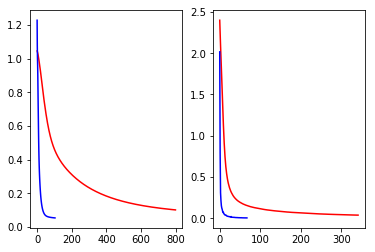

In [17]:
def plot_on_dataset(X, y, name, X_test, y_test):
    # for each dataset, plot learning for each learning strategy
    
    # scale inputs
    X = MinMaxScaler().fit_transform(X)
    
    mlps = []
    max_iter = 1000

    # train
    for label, param in zip(labels, params):
        mlp = MLPClassifier(verbose=0, random_state=0,
                            max_iter=max_iter, **param)
        mlp.fit(X, y)
        mlps.append(mlp)
        print("Training set score: %f" % mlp.score(X, y))
        print("Training set loss: %f" % mlp.loss_)
    # plot training stats
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

# load datasets
iris = datasets.load_iris()
digits = datasets.load_digits()
data_sets = [('iris',   iris.data,   iris.target),
             ('digits', digits.data, digits.target)]

for i,d in enumerate(data_sets):
    name = d[0]
    data = d[1]
    target = d[2]

    print("\nlearning on dataset %s" % name)
    
    # split dataset
    X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=12345)
    print(model_selection.train_test_split(data, target, test_size=0.3, random_state=12345))
    plt.subplot(1, 2, i+1)
    plot_on_dataset(X=X_train, y=y_train, name=name, X_test=X_test, y_test=y_test)


plt.show()

## Naive Bayes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import numpy as np


text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),])

text_clf_tfidf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),])

# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'comp.graphics',
]
# Uncomment the following to do the analysis on all the categories
#categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
print("%d documents" % len(twenty_train.filenames))
print("%d categories" % len(twenty_train.target_names))
print()


# #############################################################################
# fit data

text_clf.fit(twenty_train.data, twenty_train.target)  
text_clf_tfidf.fit(twenty_train.data, twenty_train.target)  



# #############################################################################
# evaluate
docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
predicted_tfidf = text_clf_tfidf.predict(docs_test)

print(np.mean(predicted == twenty_test.target))
print(np.mean(predicted_tfidf == twenty_test.target))


In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, 
                                    predicted, 
                                    target_names=twenty_test.target_names))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(twenty_test.target, 
                                    predicted_tfidf, 
                                    target_names=twenty_test.target_names))

In [66]:
docs = ['God is love', 'OpenGL on the GPU is fast']
docs_preds = text_clf.predict(docs)
for i,doc in enumerate(docs):
    print('{} -> {}'.format(doc, twenty_train.target_names[docs_preds[i]]))
    

God is love -> alt.atheism
OpenGL on the GPU is fast -> comp.graphics
